In [11]:
#Library imports
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.contingency import association


## Heart 2022

### Exploratory Data Analysis

In [9]:
# import the dataset
heart_d = pd.read_csv('../../Data/heart_2022_with_nans.csv')

In [7]:
heart_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [4]:
# check missing in column 
heart_d.isnull().sum().sort_values(ascending=False)

TetanusLast10Tdap            82516
PneumoVaxEver                77040
HIVTesting                   66127
ChestScan                    56046
CovidPos                     50764
HighRiskLastYear             50623
BMI                          48806
FluVaxLast12                 47121
AlcoholDrinkers              46574
WeightInKilograms            42078
ECigaretteUsage              35660
SmokerStatus                 35462
HeightInMeters               28652
DifficultyErrands            25656
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
BlindOrVisionDifficulty      21564
DeafOrHardOfHearing          20647
RaceEthnicityCategory        14057
RemovedTeeth                 11360
PhysicalHealthDays           10927
AgeCategory                   9079
MentalHealthDays              9067
LastCheckupTime               8308
SleepHours                    5453
HadAngina                     4405
HadSkinCancer                 3143
HadHeartAttack      

Text(0.5, 1.0, 'Distribution of missing values in the dataset')

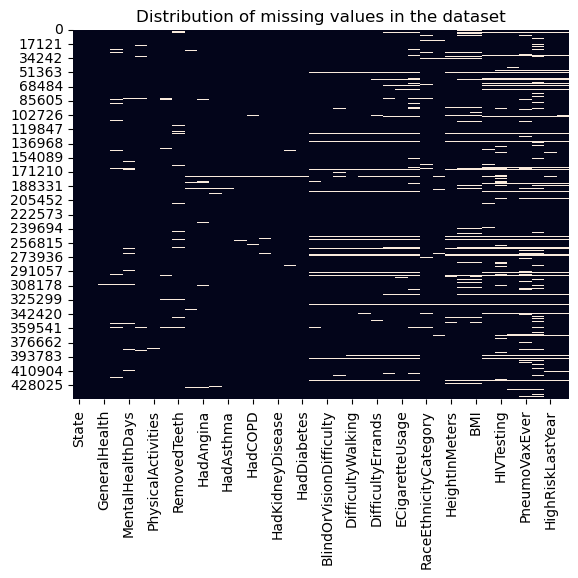

In [10]:
# heatmap of missing values
sns.heatmap(heart_d.isnull(), cbar=False)
# add title
plt.title('Distribution of missing values in the dataset')

In [6]:
# create a new column to indicate if the patient had any of heart diseases
heart_d['HadHeartDisease'] = heart_d.apply(lambda row: 'Yes' if 'Yes' in \
                                           [row['HadHeartAttack'],
                                            row['HadStroke'],
                                            row['HadAngina']] \
                                            else 'No', 
                                            axis=1)

In [7]:
print(pd.crosstab(index = heart_d['HadHeartAttack'],columns = heart_d['HadStroke']))
print("=============================")
print(pd.crosstab(index = heart_d['HadHeartAttack'],columns = heart_d['HadAngina']))
print("=============================")
print(pd.crosstab(index = heart_d['HadStroke'],columns = heart_d['HadAngina']))


HadStroke           No    Yes
HadHeartAttack               
No              402131  13960
Yes              19970   4936
HadAngina           No    Yes
HadHeartAttack               
No              400360  14240
Yes              11971  11908
HadAngina      No    Yes
HadStroke               
No         399041  22006
Yes         14233   4366


In [46]:
def check_associations(df, outcomes):
    """
    Check for NAs in the outcome columns, dummy code the outcomes to integers, 
    and calculate pairwise associations using Cramer's V.

    Inputs:
        df: DataFrame containing the data
        outcomes: list of outcome column names
    
    Returns:
        None
    
    Raises:
        Exception: Generic exceptions could be raised due to data issues 
        or misconfiguration of the 'association()' function.

    """
    # Check for NAs in the outcome columns
    na_present = df[outcomes].isna().any().any()
    if na_present:
        print("Input data contains NAs. Please handle missing data before proceeding.")
        return
    else:
        print("No NAs in the input data. Proceeding with calculations.")

    # Dummy coding the outcomes to integers
    for outcome in outcomes:
        df[outcome + '_dm'] = df[outcome].map({'Yes': 1, 'No': 0}).astype(int)

    print("Pairwise associations using Cramer's V calculated by the 'association' function:")

    # Calculate pairwise associations using Cramer's V
    for i in range(len(outcomes)):
        for j in range(i + 1, len(outcomes)):
            outcome1 = outcomes[i] + '_dm'
            outcome2 = outcomes[j] + '_dm'
            try:
                # Using the provided association function which accepts a DataFrame slice and a method
                result = association(df[[outcome1, outcome2]], method='cramer')
                print(f"Association between {outcomes[i]} and {outcomes[j]}: {result}")
            except Exception as e:
                print(f"Error calculating association between {outcomes[i]} and {outcomes[j]}: {e}")
    

# test
outcomes = ['HadHeartAttack', 'HadStroke', 'HadAngina']
check_associations(heart_d, outcomes)


Input data contains NAs. Please handle missing data before proceeding.


Text(0.5, 1.0, 'Correlation Heatmap on numeric data')

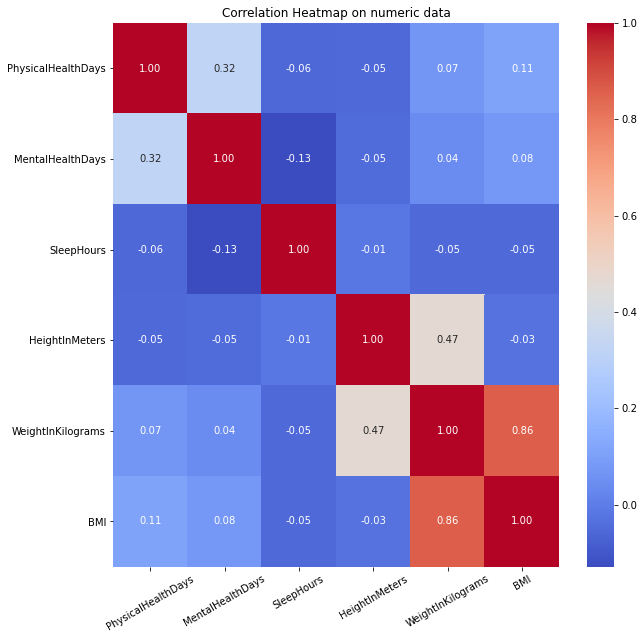

In [5]:
# correlation of the numerics
plt.figure(figsize=(10,10))
sns.heatmap(heart_d.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
# tilt the x-axis labels
plt.xticks(rotation = 30)
plt.title("Correlation Heatmap on numeric data")
#plt.savefig('../../Figures/heatmap.png')

In [30]:
# tabulate the proportion of patients with heart diseases
heart_d['HadHeartDisease'].value_counts(normalize = True).round(2)

No     0.88
Yes    0.12
Name: HadHeartDisease, dtype: float64

Text(0.5, 1.0, 'Proportion of patients with heart diseases')

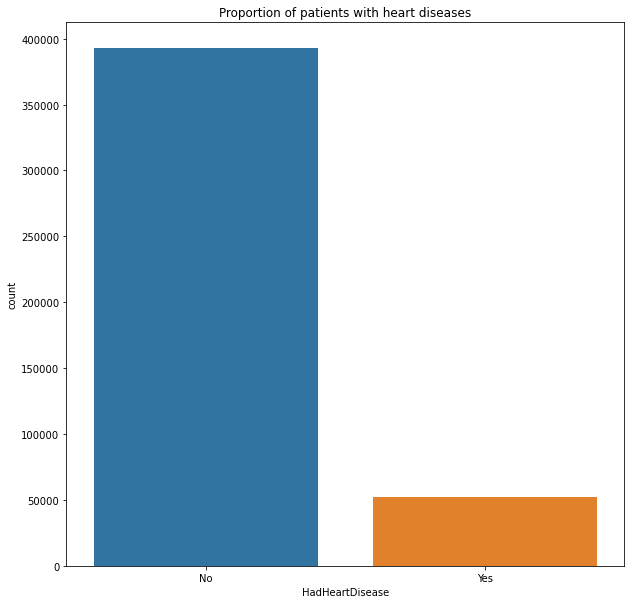

In [6]:
# proportion of patients with heart diseases
plt.figure(figsize=(10,10))
sns.countplot(x = 'HadHeartDisease', data = heart_d)
plt.title("Proportion of patients with heart diseases")

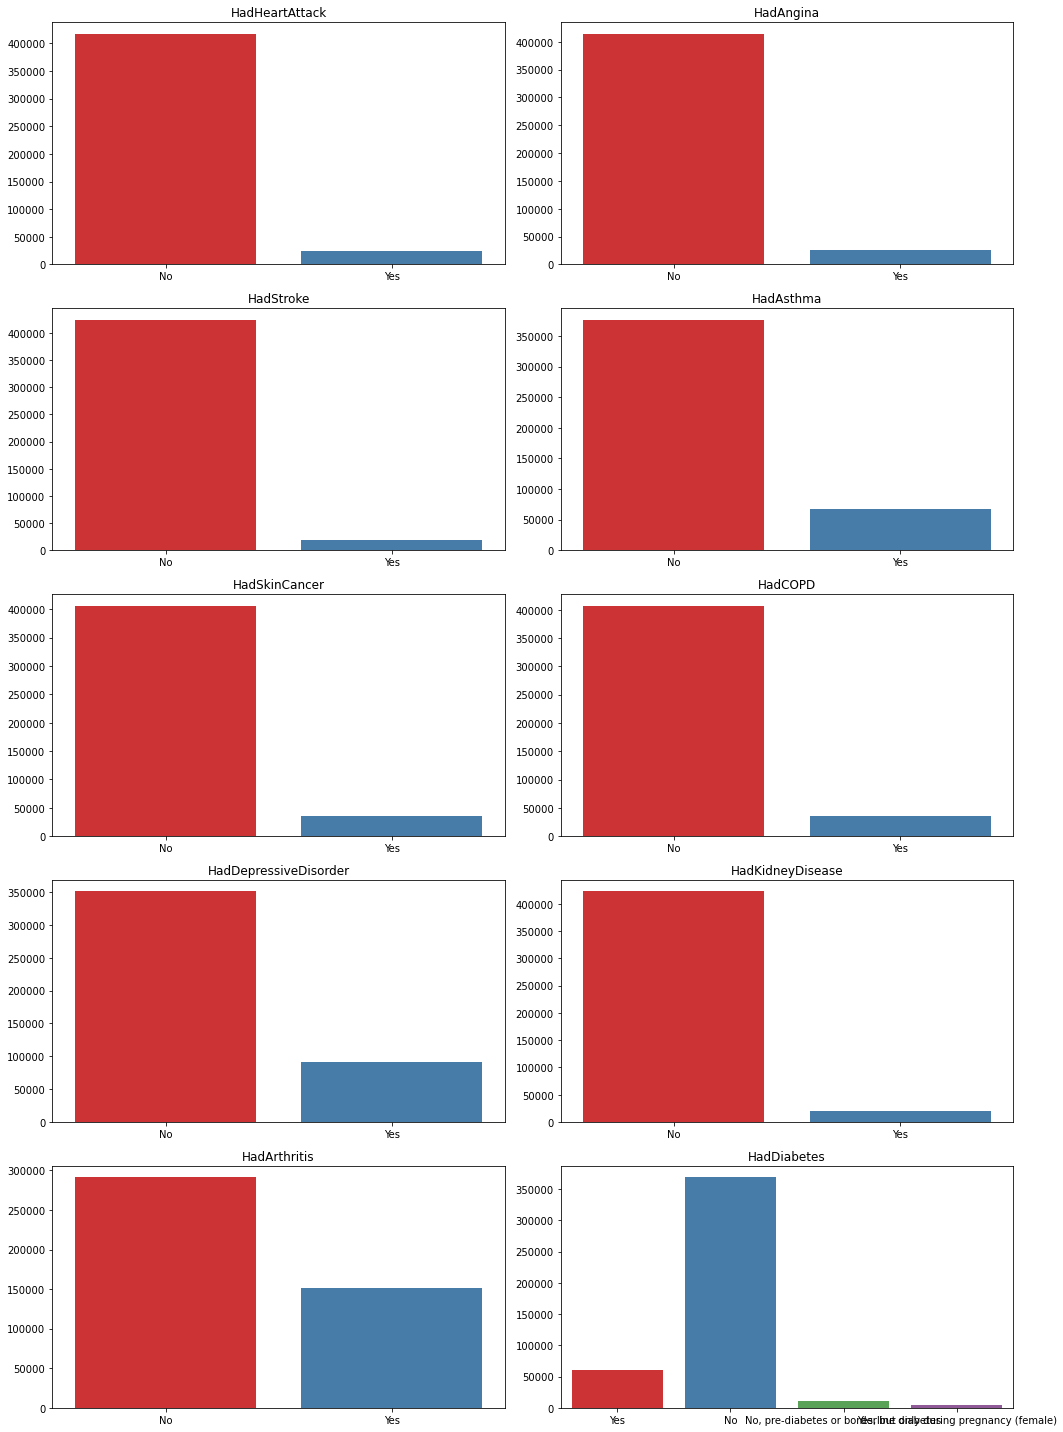

In [24]:
# get all columns that start with "had"
had_cols = [col for col in heart_d.columns if 'Had' in col]

# plot the count plot above with a for loop
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(15,20)

for i, col in enumerate(had_cols):
    sns.countplot(heart_d[col], ax = axes[i//2, i%2], 
                  palette = 'Set1')
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
plt.tight_layout()

#### Correlating impairments to age

In [29]:
impairment = [col for col in heart_d.columns if 'Difficulty' in col]
# add one more columns to the list
impairment.extend(['DealORHardOfHearing'])

Text(0.5, 1.0, 'Count of AgeCategory')

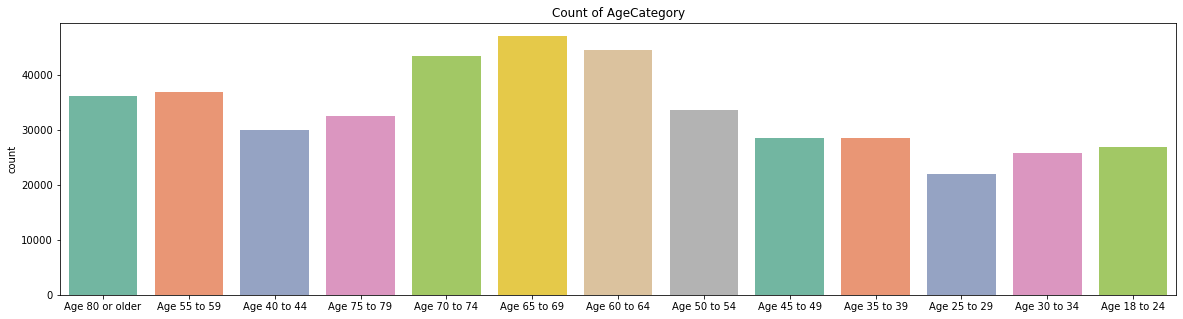

In [37]:
# see proportion for AgeCategory
plt.figure(figsize=(20,5))
sns.countplot(heart_d['AgeCategory'], palette = 'Set2')
plt.xlabel('')
plt.title('Count of AgeCategory')